## EECS 545 Homework 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Q4

In [2]:
# EECS 545 HW3 Q4
np.random.seed(545)

# Instruction: use these hyperparameters for both (b) and (d)
eta = 0.5
C = 5
iterNums = [5, 50, 100, 1000, 5000, 6000]

In [3]:
def svm_train_bgd(matrix: np.ndarray, label: np.ndarray, nIter: int):
    # Implement your algorithm and return state (e.g., learned model)
    state = {}
    N, D = matrix.shape
    w = np.zeros(D)
    b = 0

    for i in range(nIter):
        temp_w, temp_b = 0, 0
        for j in range(N):
            ind = 1 if label[j] * (w @ matrix[j] + b) < 1 else 0
            temp_w += ind * label[j] * matrix[j]
            temp_b += ind * label[j]
        grad_w = w - C * temp_w
        grad_b = - C * temp_b
        
        alpha_i = eta / (1 + eta * i)
        w -= alpha_i * grad_w
        b -= 0.01 * alpha_i * grad_b
        
    state = {'w': w, 'b': b}
    return state

In [4]:
def svm_train_sgd(matrix: np.ndarray, label: np.ndarray, nIter: int):
    # Implement your algorithm and return state (e.g., learned model)
    state = {}
    N, D = matrix.shape
    w = np.zeros(D)
    b = 0

    for i in range(nIter):
        for j in range(N):
            ind = 1 if label[j] * (w @ matrix[j] + b) < 1 else 0
            grad_w = w / N - C * ind * label[j] * matrix[j]
            grad_b = - C * ind * label[j]
            
            alpha_i = eta / (1 + eta * i)
            w -= alpha_i * grad_w
            b -= 0.01 * alpha_i * grad_b
    
    state = {'w': w, 'b': b}
    return state

In [5]:
def svm_test(matrix: np.ndarray, state):
    # Classify each test data as +1 or -1
    output = np.ones( (matrix.shape[0], 1) )
    
    w = state['w']
    b = state['b']
    for i in range(matrix.shape[0]):
        temp = w @ matrix[i].T
        output[i] = 1 if temp >= 1 else -1
    return output

In [6]:
def evaluate(output: np.ndarray, label: np.ndarray, nIter: int) -> float:
    # Use the code below to obtain the accuracy of your algorithm
    accuracy = (label * output > 0).sum() * 1. / len(output)
    print('[Iter {:4d}: accuracy = {:2.4f}%'.format(nIter, 100 * accuracy))

    return accuracy

In [7]:
def load_data():
    # Note1: label is {-1, +1}
    # Note2: data matrix shape  = [Ndata, 4]
    # Note3: label matrix shape = [Ndata, 1]

    # Load data
    q4_data = np.load('q4_data/q4_data.npy', allow_pickle=True).item()

    train_x = q4_data['q4x_train']
    train_y = q4_data['q4y_train']
    test_x = q4_data['q4x_test']
    test_y = q4_data['q4y_test']
    return train_x, train_y, test_x, test_y

In [8]:
def run_bgd(train_x, train_y, test_x, test_y):
    '''(c) Implement SVM using **batch gradient descent**.
    For each of the nIter's, print out the following:

    *   Parameter w
    *   Parameter b
    *   Test accuracy (%)
    '''
    for nIter in iterNums:
        # Train
        state = svm_train_bgd(train_x, train_y, nIter)

        # TODO: Test and evluate
        prediction = svm_test(test_x, state)
        print(f'w: {state["w"]}, b: {state["b"]}')
        evaluate(prediction, test_y, nIter)

In [9]:
def run_sgd(train_x, train_y, test_x, test_y):
    '''(c) Implement SVM using **stocahstic gradient descent**.
    For each of the nIter's, print out the following:

    *   Parameter w
    *   Parameter b
    *   Test accuracy (%)

    [Note: Use the same hyperparameters as (b)]
    [Note: If you implement it correctly, the running time will be ~15 sec]
    '''
    for nIter in iterNums:
        # Train
        state = svm_train_sgd(train_x, train_y, nIter)

        # TODO: Test and evluate
        prediction = svm_test(test_x, state)
        print(f'w: {state["w"]}, b: {state["b"]}')
        evaluate(prediction, test_y, nIter)

In [10]:
train_x, train_y, test_x, test_y = load_data()
run_bgd(train_x, train_y, test_x, test_y)
run_sgd(train_x, train_y, test_x, test_y)

w: [112.   -42.75 272.5  103.  ], b: [-0.12416667]
[Iter    5: accuracy = 54.1667%
w: [ -2.01960784 -11.94117647  25.85294118  11.54901961], b: [-0.37280358]
[Iter   50: accuracy = 95.8333%
w: [-2.55940594 -5.28217822 11.37623762  5.75742574], b: [-0.38285]
[Iter  100: accuracy = 95.8333%
w: [-0.46353646 -0.32617383  1.05394605  1.27872128], b: [-0.40401205]
[Iter 1000: accuracy = 95.8333%
w: [-0.32083583 -0.27904419  0.89262148  0.98660268], b: [-0.4184513]
[Iter 5000: accuracy = 95.8333%
w: [-0.32919513 -0.28186969  0.886019    0.97483753], b: [-0.4199084]
[Iter 6000: accuracy = 95.8333%
w: [-1.78136842 -3.12818738  8.55400016  5.20287663], b: [-0.05416667]
[Iter    5: accuracy = 95.8333%
w: [-1.37946899e+00  9.07974830e-04  2.58689377e+00  2.85570760e+00], b: [-0.08671111]
[Iter   50: accuracy = 95.8333%
w: [-1.25745166  0.11439094  1.70851556  2.31719145], b: [-0.09433571]
[Iter  100: accuracy = 95.8333%
w: [-0.48895966 -0.18986655  0.95735748  1.14001054], b: [-0.12014856]
[Iter 1

### Q5

In [11]:
from sklearn.svm import LinearSVC

np.random.seed(545)

In [12]:
def readMatrix(filename: str):
    # Use the code below to read files
    with open(filename, 'r') as fd:
        hdr = fd.readline()
        rows, cols = [int(s) for s in fd.readline().strip().split()]
        tokens = fd.readline().strip().split()
        matrix = np.zeros((rows, cols))
        Y = []
        for i, line in enumerate(fd):
            nums = [int(x) for x in line.strip().split()]
            Y.append(nums[0])
            kv = np.array(nums[1:])
            k = np.cumsum(kv[:-1:2])
            v = kv[1::2]
            matrix[i, k] = v
        return matrix, tokens, np.array(Y)

In [13]:
def evaluate(output, label) -> float:
    # Use the code below to obtain the accuracy of your algorithm
    error = float((output != label).sum()) * 1. / len(output)
    print('Error: {:2.4f}%'.format(100 * error))

    return error

In [14]:
# Load files
# Note 1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
# Note 2: Spam emails are denoted as class 1, and non-spam ones as class 0.
dataMatrix_train, tokenlist, category_train = readMatrix('q5_data/MATRIX.TRAIN')
dataMatrix_test, tokenlist, category_test = readMatrix('q5_data/MATRIX.TEST')

# Train
model = LinearSVC(max_iter=20000).fit(dataMatrix_train, category_train)

# Test and evluate
prediction = model.predict(dataMatrix_test)
evaluate(prediction, category_test)

Error: 0.3750%


0.00375

In [15]:
sizes = [50, 100, 200, 400, 800, 1400]
errors = list()
file_prefix = 'q5_data/MATRIX.TRAIN.'

for s in sizes:
    dataMatrix_train, tokenlist, category_train = readMatrix(f'{file_prefix + str(s)}')
    model = LinearSVC().fit(dataMatrix_train, category_train)
    prediction = model.predict(dataMatrix_test)
    decision_function = model.decision_function(dataMatrix_train)
    support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
    support_vector_count = len(dataMatrix_train[support_vector_indices])

    print(f'Training size: {s}')
    print(f'Number of support vectors: {support_vector_count}')
    errors.append(evaluate(prediction, category_test))

Training size: 50
Number of support vectors: 35
Error: 5.0000%
Training size: 100
Number of support vectors: 55
Error: 3.0000%
Training size: 200
Number of support vectors: 87
Error: 1.2500%
Training size: 400
Number of support vectors: 129
Error: 1.0000%
Training size: 800
Number of support vectors: 196
Error: 1.0000%
Training size: 1400
Number of support vectors: 234
Error: 0.8750%


Text(0, 0.5, 'Error')

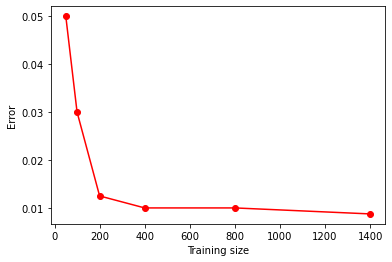

In [16]:
plt.plot(sizes, errors, '-ro')
plt.xlabel('Training size')
plt.ylabel('Error')